Treinando primeiro modelo
Pesos iniciais:
[0.71230651 0.21201977 0.15088509 0.30166356 0.07115928]
Pesos finais:
[-1.81135938  1.31256827  1.64140173 -0.42649017 -1.17713835]
O treino demorou 904 epocas

Treinando segundo modelo
Pesos iniciais:
[0.15698022 0.51291442 0.23538799 0.21898179 0.95835852]
Pesos finais:
[-1.81140612  1.31253393  1.64137259 -0.42660687 -1.17712471]
O treino demorou 885 epocas

Treinando terceiro modelo
Pesos iniciais:
[0.47045262 0.91313711 0.8970841  0.62765913 0.67706801]
Pesos finais:
[-1.81132787  1.31263701  1.64147861 -0.42632101 -1.17718063]
O treino demorou 890 epocas

Treinando quarto modelo
Pesos iniciais:
[0.62752309 0.91212476 0.99347421 0.74542694 0.97072238]
Pesos finais:
[-1.8113401   1.31265109  1.64149996 -0.42630573 -1.17719382]
O treino demorou 905 epocas

Treinando quinto modelo
Pesos iniciais:
[0.27091779 0.42568511 0.77100368 0.53004386 0.89241384]
Pesos finais:
[-1.8112764   1.31257846  1.6413897  -0.42638382 -1.17712568]
O treino demor

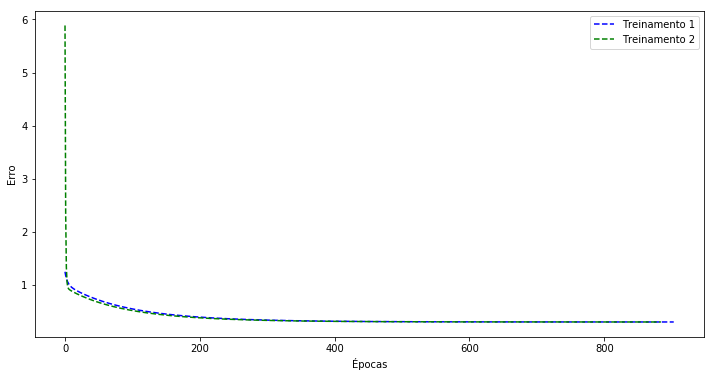

In [22]:
import numpy as np

inf  = 0x3f3f3f3f

class Ponto:
	cords = []
	def __init__(self, cords):
		self.cords = cords

def g(n):
	if(n > 0):
		return 1
	else:
		return -1

def eqm(d, u):

	ans = 0
	for i in range(len(d)):
		ans += (d[i] - u[i])**2
	return ans * (1/len(d))


class Adaline:

	x = []
	w = []
	def __init__(self, x):
		self.x = x
		print("Pesos iniciais:")
		self.w = np.random.rand(len(x[0].cords))
		print (self.w)
	
	
	def treina(self,):
		epocas = 0
		taxaAprendizagem = 0.0025
		limiar = -1
		eqm_ant = inf
		eqm_atual = 0
		eps = 1e-6;erros = []
		while(abs(eqm_atual - eqm_ant) > eps and epocas < 10000):
			eqm_ant = eqm_atual
			epocas += 1
			ultimo = len(self.x[0].cords)
			d1 = []
			u1 = []
			for i in range(len(self.x)):
				somatorio = limiar * self.w[0]
				for j in range(ultimo-1):
					somatorio += (self.x[i].cords[j]*self.w[j+1])
				n = somatorio
				d1.append(somatorio)
				u1.append(self.x[i].cords[ultimo-1])
				if(n != self.x[i].cords[ultimo-1]):
					self.w[0] = self.w[0] + taxaAprendizagem*(self.x[i].cords[ultimo-1] - n)*-1
					for k in range(ultimo-1):
						self.w[k+1] = self.w[k+1] + taxaAprendizagem*(self.x[i].cords[ultimo-1] - n)*self.x[i].cords[k]
			eqm_atual = eqm(d1,u1);erros.append(eqm_atual)
			#print(eqm_atual)
			#print(eqm_ant)
		print("Pesos finais:")
		print(self.w)
		print("O treino demorou %d epocas" %(epocas));return erros
	def classifica(self, ponto):
		ans = -1*self.w[0]
		for i in range(len(ponto.cords)):
			ans += (ponto.cords[i] * self.w[i+1])
		n = g(ans)
		return n

#main

#Obtendo dados de treino
treino = open('treino.txt', 'r')
saidaT = open('outputtrain.txt', 'r')
disney = treino.readlines()
saida  = saidaT.readlines()

out = []

for linha in saida:
	linha = linha.rstrip()
	x = linha.split(' ')
	out = [float(f) for f in x]
	#print(x)


pontos = []

a = 0
for linha in disney:
	linha = linha.rstrip()
	x = linha.split(' ')
	cords = []
	for j in range(len(x)):
		cords.append(float(x[j]))
	cords.append(out[a])
	f = Ponto(cords)
	pontos.append(f)
	#print(cords)
	a += 1


#Treinando os 5 modelos

print("Treinando primeiro modelo")
t1 = Adaline(pontos);x1 = t1.treina()
print("\nTreinando segundo modelo")
t2 = Adaline(pontos);x2 = t2.treina()
print("\nTreinando terceiro modelo")
t3 = Adaline(pontos);t3.treina()
print("\nTreinando quarto modelo")
t4 = Adaline(pontos);t4.treina()
print("\nTreinando quinto modelo")
t5 = Adaline(pontos);t5.treina()
print("")


y1 = [x for x in range(len(x1))]
y2 = [x for x in range(len(x2))]

import matplotlib.pyplot as plt
%matplotlib inline
# Cor e estilo da linha como MATLAB
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(y1, x1, 'b--', label = 'Treinamento 1') # linha azul tracejada
ax.plot(y2, x2, 'g--', label = 'Treinamento 2') # linha verde pontilhada
ax.set_xlabel("Épocas")
ax.set_ylabel("Erro");
ax.legend()
#Obtendo e executando os testes

teste = open("test.txt")
z = 1
for linha in teste:
	linha = linha.rstrip()
	x = linha.split(' ')
	cords = []
	for j in range(len(x)):
		cords.append(float(x[j]))
	
	f = Ponto(cords)
	print("Classificação da amostra %d" %(z))
	z += 1
	print("T1:", end="")
	print(t1.classifica(f))
	print("T2:", end="")
	print(t2.classifica(f))
	print("T3:", end="")
	print(t3.classifica(f))
	print("T4:", end="")
	print(t4.classifica(f))
	print("T5:", end="")
	print(t5.classifica(f))
	print("\n")
